In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean
import warnings
warnings.filterwarnings("ignore")

### Baseline directories:

1/4 degree: /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/ <br />
1/8 degree: /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/  <br />
1/16 degree: /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/  <br />
1/32 degree: /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/  <br />



/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/ocean.stats.nc
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/ocean.stats.nc
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/ocean.stats.nc
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/ocean.stats.nc


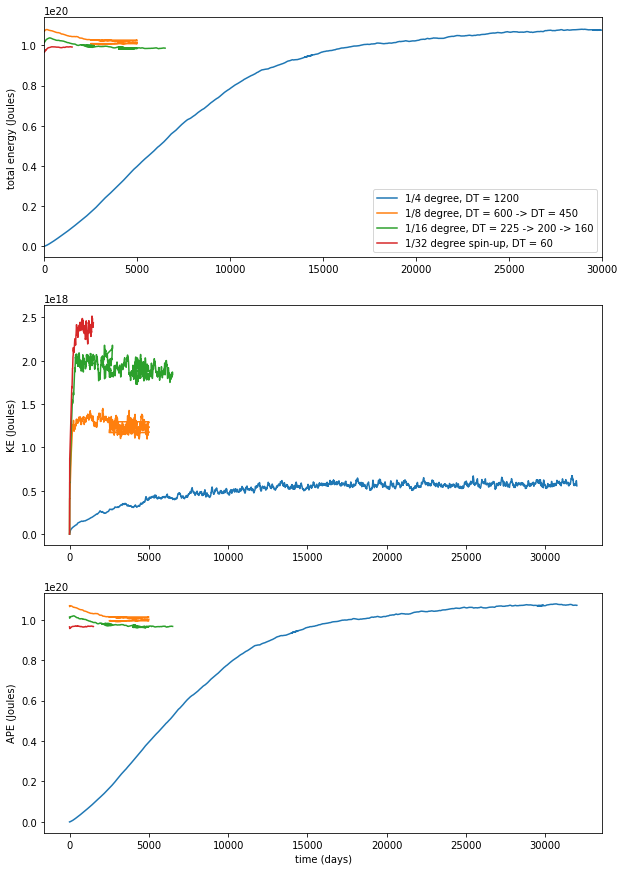

In [3]:
run = [0.25,0.125,0.0625,0.03125]
plt.figure(figsize=(10,15))
for i in range(len(run)):
    plt.subplot(3,1,1)
    os = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_%sdeg_N15_baseline/ocean.stats.nc' % run[i], decode_times=False)
    plt.plot(os.Time,os.En)
    plt.xlim((0,30000))
    plt.ylabel('total energy (Joules)') 
    plt.gca().legend(('1/4 degree, DT = 1200', '1/8 degree, DT = 600 -> DT = 450', '1/16 degree, DT = 225 -> 200 -> 160', '1/32 degree spin-up, DT = 60')) 
    plt.subplot(3,1,2)
    plt.plot(os.Time,os.KE.sum(axis=1))
    plt.ylabel('KE (Joules)')
    plt.subplot(3,1,3)
    plt.plot(os.Time,os.APE.sum(axis=1))
    plt.ylabel('APE (Joules)')
    plt.xlabel('time (days)')
    print('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_%sdeg_N15_baseline/ocean.stats.nc' % run[i])

#plt.savefig('Energy_quarter_eighth_sixteenth_degree.png', dpi=200,bbox_inches='tight',pad_inches=0)
# DT is the time-step (in seconds) used to run the model
# The slight kink on the 1/8 degree run at 14500 days is because the time-step needed to be reduced because of high CFL with DT = 600 and needed a restart with DT = 450.

In [151]:

os1 = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/ocean.stats.nc', decode_times=False)
os2 = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/ocean.stats.nc', decode_times=False)
os3 = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/ocean.stats.nc', decode_times=False)
os4 = xr.open_dataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/ocean.stats.nc', decode_times=False)


## The restarts cause the time array to not be monotonically increase:

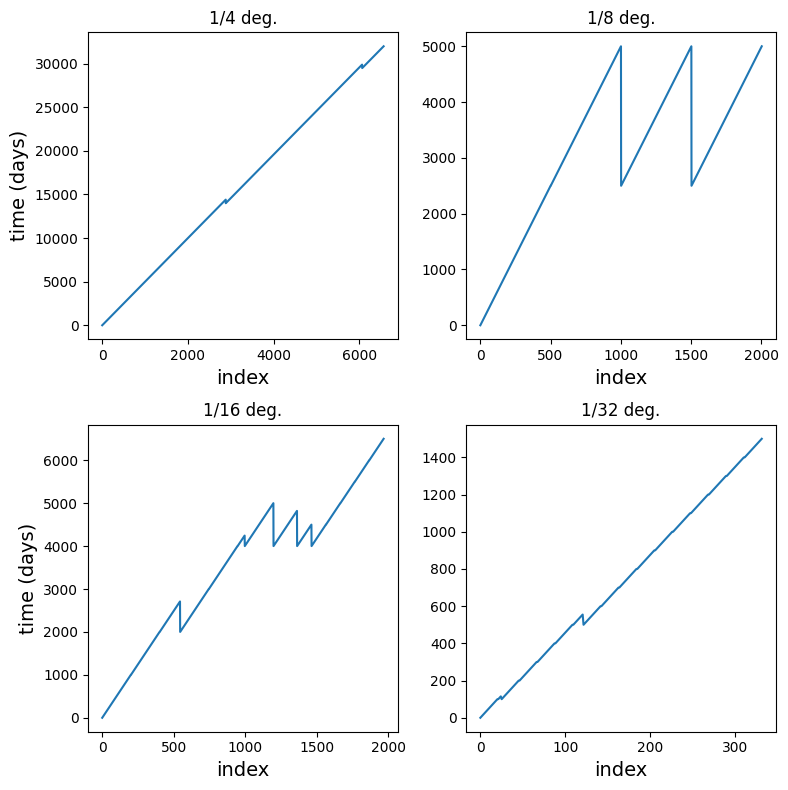

In [195]:

fig=plt.figure(figsize=(8,8),dpi=100)
plt.subplot(2,2,1)
plt.plot(np.linspace(0,os1.Time.shape[0],os1.Time.shape[0]),os1.Time)
plt.xlabel('index',fontsize=14)
plt.ylabel('time (days)',fontsize=14)
plt.title('1/4 deg.')
plt.subplot(2,2,2)
plt.plot(np.linspace(0,os2.Time.shape[0],os2.Time.shape[0]),os2.Time)
plt.xlabel('index',fontsize=14)
plt.title('1/8 deg.')

plt.subplot(2,2,3)
plt.plot(np.linspace(0,os3.Time.shape[0],os3.Time.shape[0]),os3.Time)
plt.xlabel('index',fontsize=14)
plt.ylabel('time (days)',fontsize=14)
plt.title('1/16 deg.')

plt.subplot(2,2,4)
plt.plot(np.linspace(0,os4.Time.shape[0],os4.Time.shape[0]),os4.Time)
plt.xlabel('index',fontsize=14)
plt.title('1/32 deg.')

fig.tight_layout()

## Therefore we redefine time arrays so that they are monotonically increasing and not affected by restarts. 
## The outputs are saved at 5-day inverals:


In [196]:
time1=np.arange(os1.Time.shape[0])*5
time2=time1[-1]+np.arange(os2.Time.shape[0])*5
time3=time2[-1]+np.arange(os3.Time.shape[0])*5
time4=time3[-1]+np.arange(os4.Time.shape[0])*5

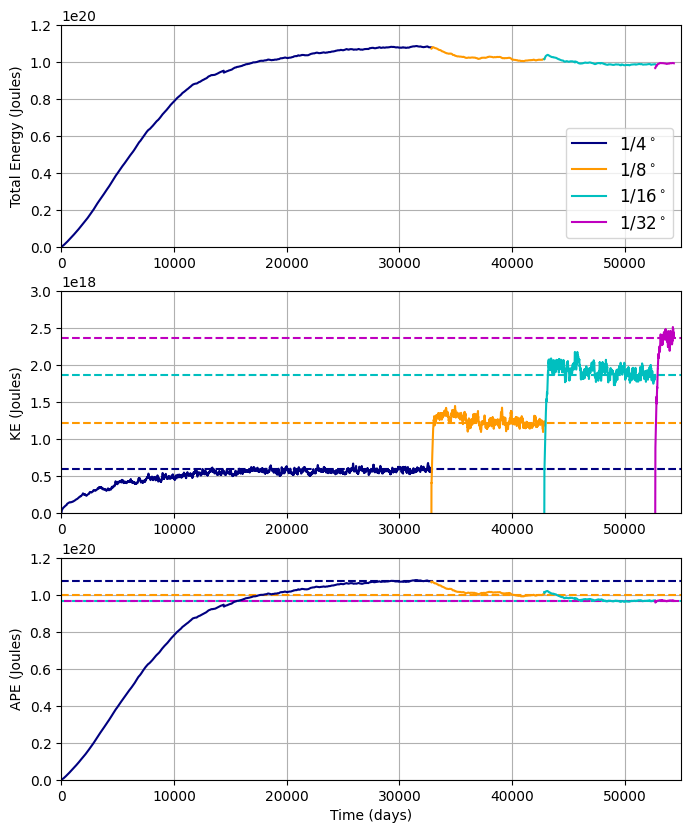

In [197]:

plt.figure(figsize=(8,10),dpi=100)
plt.subplot(3,1,1)

plt.plot(time1,os1.En,label='$1/4^\circ$',color=[0,0,0.5])
plt.plot(time2,os2.En,label='$1/8^\circ$',color=[1,.6,0]) #[0:1002]
plt.plot(time3,os3.En,label='$1/16^\circ$',color='c')
plt.plot(time4,os4.En,label='$1/32^\circ$',color='m')
plt.xlim((0,55000)); plt.ylim((0.,1.2e20))
plt.ylabel('Total Energy (Joules)') 
#plt.xlabel('Time (days)')
plt.legend(fontsize=12)
plt.grid()


plt.subplot(3,1,2)
plt.plot([0,55000],[os1.KE[-100:].sum(axis=1).mean('Time'),os1.KE[-100:].sum(axis=1).mean('Time')],'--',color=[0,0,0.5])
plt.plot([0,55000],[os2.KE[-100:].sum(axis=1).mean('Time'),os2.KE[-100:].sum(axis=1).mean('Time')],'--',color=[1,.6,0]) #[0:1002]
plt.plot([0,55000],[os3.KE[-100:].sum(axis=1).mean('Time'),os3.KE[-100:].sum(axis=1).mean('Time')],'--',color='c')
plt.plot([0,55000],[os4.KE[-100:].sum(axis=1).mean('Time'),os4.KE[-100:].sum(axis=1).mean('Time')],'--',color='m')

plt.plot(time1,os1.KE.sum(axis=1),color=[0,0,0.5])
plt.plot(time2[0:],os2.KE.sum(axis=1)[0:],color=[1,.6,0])
plt.plot(time3[0:],os3.KE.sum(axis=1)[0:],color='c')
plt.plot(time4[0:],os4.KE.sum(axis=1)[0:],color='m')
plt.xlim((0,55000)); plt.ylim((0,3e18)); 
plt.ylabel('KE (Joules)')
#plt.xlabel('Time (days)')
plt.grid()

plt.subplot(3,1,3)
plt.plot([0,55000],[os1.APE[-100:].sum(axis=1).mean('Time'),os1.APE[-100:].sum(axis=1).mean('Time')],'--',color=[0,0,0.5])
plt.plot([0,55000],[os2.APE[-100:].sum(axis=1).mean('Time'),os2.APE[-100:].sum(axis=1).mean('Time')],'--',color=[1,.6,0]) #[0:1002]
plt.plot([0,55000],[os3.APE[-100:].sum(axis=1).mean('Time'),os3.APE[-100:].sum(axis=1).mean('Time')],'--',color='c')
plt.plot([200,55000],[os4.APE[-100:].sum(axis=1).mean('Time'),os4.APE[-100:].sum(axis=1).mean('Time')],'--',color='m')

plt.plot(time1,os1.APE.sum(axis=1),color=[0,0,0.5])
plt.plot(time2,os2.APE.sum(axis=1),color=[1,.6,0])
plt.plot(time3,os3.APE.sum(axis=1),color='c')
plt.plot(time4,os4.APE.sum(axis=1),color='m')
plt.xlim((0,55000)); plt.ylim((0.,1.2e20))
plt.ylabel('APE (Joules)')
plt.xlabel('Time (days)')
plt.grid()

